# Pymaceuticals Inc.

## Analysis

In [68]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [69]:
#Path to csv files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

#Read csv files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#combine two files into one dataset
Combined_data = pd.merge(study_results, mouse_metadata, how="left",on=["Mouse ID"])
#Display top 5 results
Combined_data.head()
   

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [70]:
#information on each column data type
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [71]:
#count total number of mice not including duplicates
Mouse_count= len(Combined_data["Mouse ID"].unique())
Mouse_count

249

In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_Mouse_ID= Combined_data.loc[Combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
Duplicate_Mouse_ID

array(['g989'], dtype=object)

In [73]:
#Pulling duplicate Mouse ID (g989) data
Duplicate_df=Combined_data.loc[Combined_data["Mouse ID"]=="g989",:]
Duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [74]:
#df = df[df['Mouse ID'].isin(duplicate_mouse_ids)==False]

In [75]:
#set Mouse ID as index to drop duplicate Mouse ID g989
clean_df=Combined_data.set_index("Mouse ID")
clean_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
f932,0,45.000000,0,Ketapril,Male,15,29
g107,0,45.000000,0,Ketapril,Female,2,29
a457,0,45.000000,0,Ketapril,Female,11,30
c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...
r944,45,41.581521,2,Capomulin,Male,12,25
u364,45,31.023923,3,Capomulin,Male,18,17
p438,45,61.433892,1,Ceftamin,Female,11,26


In [76]:
#Dropping duplicate mouse ID g989 altogether from dataframe
clean_df=clean_df.drop("g989")
clean_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
f932,0,45.000000,0,Ketapril,Male,15,29
g107,0,45.000000,0,Ketapril,Female,2,29
a457,0,45.000000,0,Ketapril,Female,11,30
c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...
r944,45,41.581521,2,Capomulin,Male,12,25
u364,45,31.023923,3,Capomulin,Male,18,17
p438,45,61.433892,1,Ceftamin,Female,11,26


In [77]:
#Reset index
clean_df_final= clean_df.reset_index(drop=False)
clean_df_final

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [78]:
#Checking mice count 
Final_Mouse_count= len(clean_df_final["Mouse ID"].unique())
Final_Mouse_count

248

## Summary Statistics

In [79]:
#Group data by Drug name
Summary_stats_df = clean_df_final.groupby("Drug Regimen")

#Calculated mean, median, variance, standard deviation and sem for each drug

Average_tumor=Summary_stats_df["Tumor Volume (mm3)"].mean()

Median_tumor=Summary_stats_df["Tumor Volume (mm3)"].median()

var_tumor=Summary_stats_df["Tumor Volume (mm3)"].var()

sdev_tumor=Summary_stats_df["Tumor Volume (mm3)"].std()

SEM_tumor=Summary_stats_df["Tumor Volume (mm3)"].sem()


In [80]:
#Place results in DataFrame
Summary_table=pd.DataFrame({"Tumor Volume Mean": Average_tumor, "Tumor Volume Median": Median_tumor, "Tumor Volume Var": var_tumor, "Tumor Volume Std": sdev_tumor,"Tumor Volume Std.Err": SEM_tumor})
Summary_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Var,Tumor Volume Std,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [81]:
#Displaying mean,median, variance, standard deviation, sem using aggregation method
Summary_table_agg= Summary_stats_df.agg({"Tumor Volume (mm3)":["mean","median", "var", "std", "sem"]})
Summary_table_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice Tested Per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

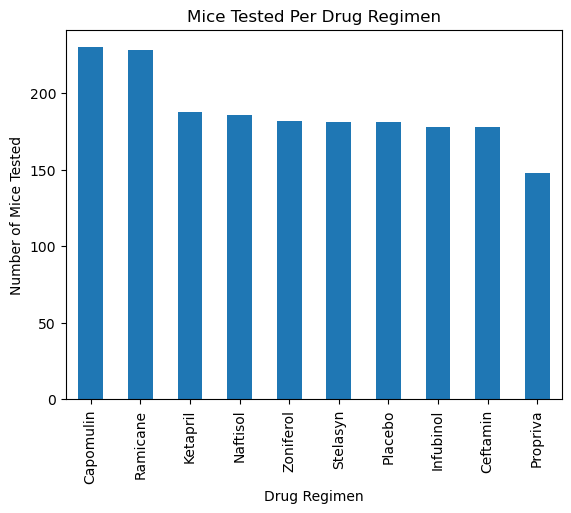

In [82]:
#new dataframe display number of mice tested for each drug
pandas_plot= clean_df_final["Drug Regimen"].value_counts()


#plot above data in bar graph with x & y axis labels, title
pandas_plot.plot(kind="bar", xlabel= "Drug Regimen", ylabel="Number of Mice Tested", title="Mice Tested Per Drug Regimen")




(-0.75, 9.75)

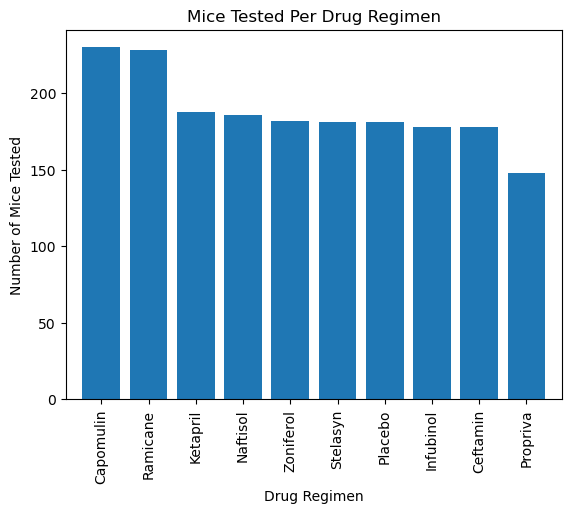

In [83]:
#Counting number of mice test for each Drug, value for y axis
y=clean_df_final["Drug Regimen"].value_counts()
#number of drug counted, values for x axis
x=np.arange(len(y))
#set labels for x axis
labels= y.index.values

#set location for xticks 
tick_locations = [value for value in x]
plt.xticks(tick_locations, labels)

#plot bar graph
plt.bar(x, y, align="center")

#adjust xtick labels
plt.xticks(rotation=90)

#labeling x & y axis and giving graph title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Mice Tested Per Drug Regimen")

#setting limits for graph
plt.xlim(-0.75, len(x)-0.25)


<AxesSubplot:title={'center':'Male vs Female Mice Distribution'}, ylabel='Sex'>

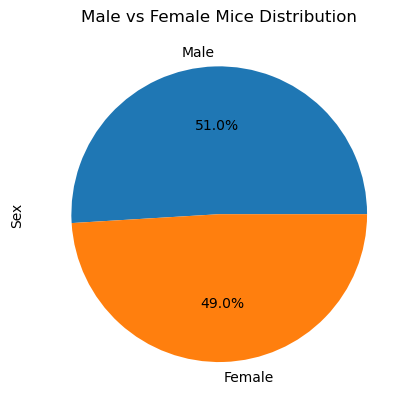

In [84]:
#Pull total number of mice per sex in new Data Frame
sex_mouse=clean_df_final['Sex'].value_counts()
sex_mouse
#Plot Pie chart, with percentage and title displayed
sex_mouse.plot(kind="pie", autopct="%1.1f%%", title="Male vs Female Mice Distribution")


Text(0, 0.5, 'Sex')

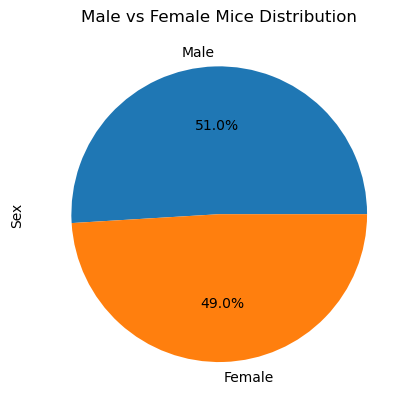

In [85]:
#Pull total number of mice per sex in new DataFrame
sex_mouse=clean_df_final['Sex'].value_counts()
#Setting labels for data to be charted
labels= sex_mouse.index.values

#Plot Pie chart with percentage, labels, title and y axis label
plt.pie(sex_mouse, autopct="%1.1f%%", labels=labels)
plt.title("Male vs Female Mice Distribution")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [86]:
#Create New DataFrame grouping data by Mouse ID
#Pull Maximum Timepoint for each Mouse ID 
mouse_timepoint_df= pd.DataFrame(clean_df_final.groupby("Mouse ID")["Timepoint"].max()).reset_index()
#print(mouse_timepoint_df)

#Place Maximum Timepoint for each Mouse ID in a Column
mouse_timepoint_df2= mouse_timepoint_df.rename(columns={"Timepoint":"Timepoint MAX"})

#Merge Max Timepoint for each Mouse in the rest of the data
merge_data_df= pd.merge(clean_df_final,mouse_timepoint_df2, on="Mouse ID" )
merge_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint MAX
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [87]:
#Place the four Drug Regimens that are being analyzed
Treatment_groups=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#Create a empty list fill with tumor volume data
tumor_vol_data=[]

#For loop to get data for each Drug Regimen above
for group in Treatment_groups:
    
    #filtering the dataset for drug regimen with Treatment_groups list
    Drug_df=merge_data_df.loc[merge_data_df["Drug Regimen"]== group]
    
    #look for row the containts same Timepoint as Timepoint MAX
    Timepoint_df= Drug_df.loc[Drug_df["Timepoint"]==Drug_df["Timepoint MAX"]]
    
    #locating Tumor volume for Timepoint and place data in empty list above
    Volume_df=Timepoint_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(Volume_df)
    #tumor_vol_data
    
    #Quartile Calculations
    quartiles = Volume_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    
    
    outliers =  Volume_df.loc[(Timepoint_df["Tumor Volume (mm3)"] < lower_bound) | (Timepoint_df["Tumor Volume (mm3)"] > upper_bound)]
    print(outliers)
    
    #Displaying results
    #print(f'For Drug Regimen {group}, Tumor Volume values below {lower_bound} or above {upper_bound} could be outliers.')
    #print(f'For Drug Regimen {group}, has {outliers} Outliers.')

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [88]:
outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

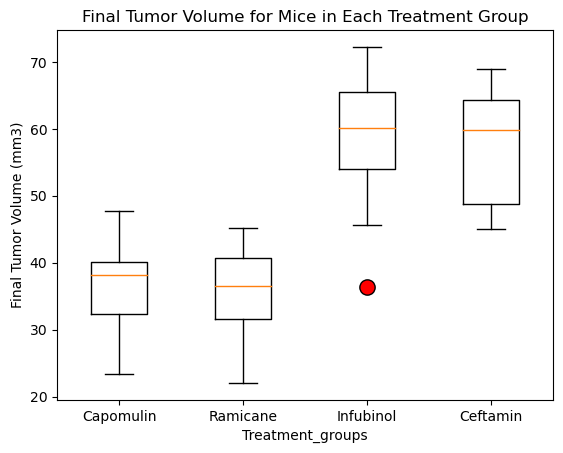

In [89]:
#plotting Box plot with title and x and y, xticks labels, fill and changed size of outlier
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Mice in Each Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel("Treatment_groups")
ax1.boxplot(tumor_vol_data, flierprops={'markersize': 11, 'markerfacecolor': 'red'})
plt.xticks([1,2,3,4], Treatment_groups)
plt.show()

## Lines and Scatter Plots

In [90]:
#Display dataset with only data that used Capomulin Drug Regimen
df = clean_df_final
df_drug= df.loc[df["Drug Regimen"]== "Capomulin"]
#Displayed r554 Mouse data for plotting
df_Mouse= df_drug.loc[df_drug["Mouse ID"] =="r554"]
df_Mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
225,r554,0,45.000000,0,Capomulin,Female,8,17
429,r554,5,45.781746,1,Capomulin,Female,8,17
494,r554,10,39.005494,2,Capomulin,Female,8,17
802,r554,15,35.463758,2,Capomulin,Female,8,17
932,r554,20,36.015589,2,Capomulin,Female,8,17
1232,r554,25,33.893345,3,Capomulin,Female,8,17
1329,r554,30,32.680655,3,Capomulin,Female,8,17
1522,r554,35,33.069337,3,Capomulin,Female,8,17
1721,r554,40,31.804841,3,Capomulin,Female,8,17
1775,r554,45,32.377357,3,Capomulin,Female,8,17


Text(0.5, 1.0, 'Capomulin Treatment for Mouse r554')

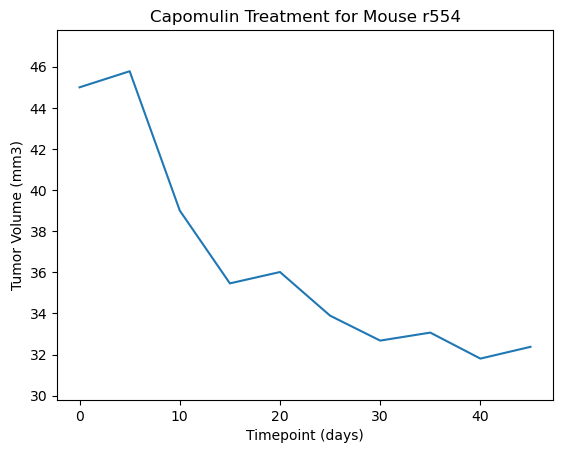

In [91]:
#plotting r554 Mouse timepoint vs tumor volume data
#Plcing x and y labels, title , y limitations
plt.plot(df_Mouse["Timepoint"], df_Mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(min(df_Mouse["Tumor Volume (mm3)"])- 2, max(df_Mouse["Tumor Volume (mm3)"]) + 2)
plt.title("Capomulin Treatment for Mouse r554")

In [92]:
#Display dataset with only data that used Capomulin Drug Regimen
df = clean_df_final
df_drug= df.loc[df["Drug Regimen"]== "Capomulin"]
#df_drug.head(50)

In [93]:
#Groupby Mouse ID and get the average Tumor Volume for each Mouse ID
TumVol_mouse_df= pd.DataFrame(df_drug.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
#TumVol_mouse_df

In [94]:
#Merge the above datasets to include tumor volume column
merge_TumVol_weight= pd.merge(TumVol_mouse_df, df_drug, on=["Mouse ID"])
#merge_TumVol_weight

Text(0, 0.5, 'Tumor Volume (mm3)')

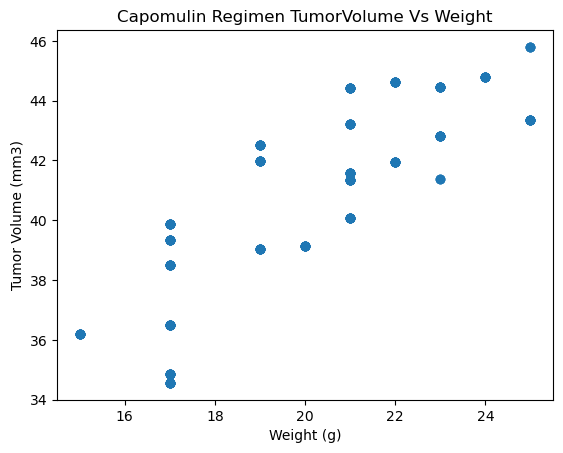

In [95]:
#plot scatter plot for weight vs tumor volume
plt.scatter(merge_TumVol_weight["Weight (g)"], merge_TumVol_weight["Tumor Volume (mm3)_x"])

#label x and y axis and title scatter plot
plt.title("Capomulin Regimen TumorVolume Vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


## Correlation and Regression 

The correlation between mouse weight and the average tumor volume is 0.83.


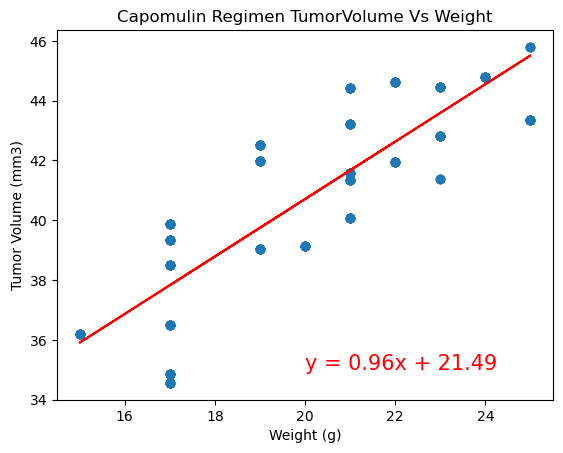

In [96]:
#label x and y axis and title scatter plot
plt.scatter(merge_TumVol_weight["Weight (g)"], merge_TumVol_weight["Tumor Volume (mm3)_x"])
plt.title("Capomulin Regimen TumorVolume Vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


#Calculating Line Regression line and the correlation coefficient
(slope, intercept, rvalue, pvalue, stderr) = linregress(merge_TumVol_weight["Weight (g)"], merge_TumVol_weight["Tumor Volume (mm3)_x"])
regress_values = merge_TumVol_weight["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(merge_TumVol_weight["Weight (g)"],regress_values,"r-")
correlation = st.pearsonr(merge_TumVol_weight["Weight (g)"], merge_TumVol_weight["Tumor Volume (mm3)_x"])

#Printing line regression equation on graph
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

#Displaying Results
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.')